In [10]:
import os
import h5py
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

# define style for figures
sns.set_theme()
sns.set_style("white")
sns.set_context("notebook")
sns.set_palette("Paired")

C:\Users\Sarah\AppData\Local\Temp\ipykernel_20668\162163561.py:23: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(10,5))


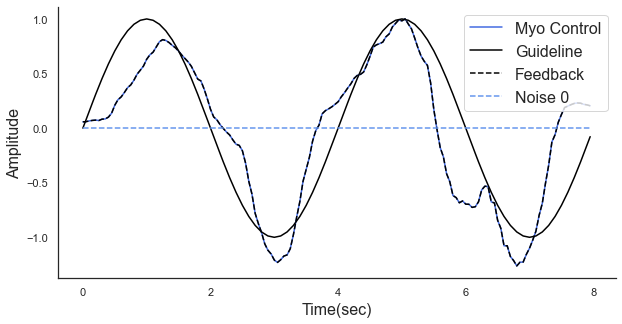

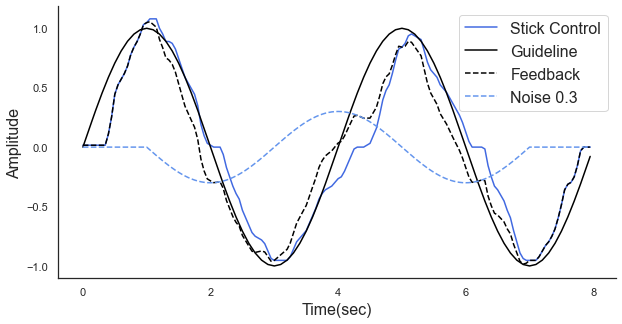

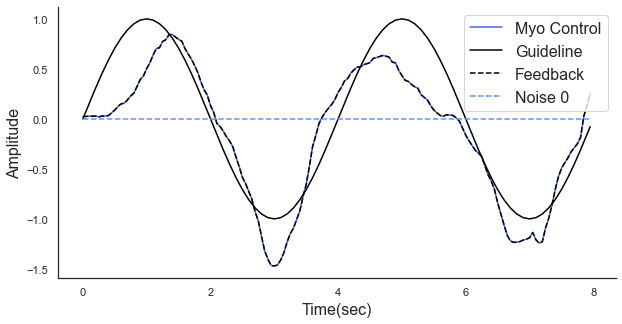

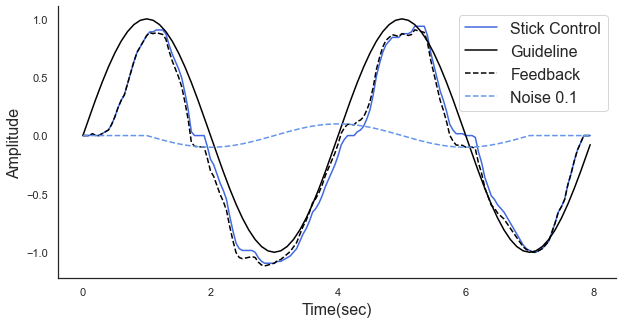

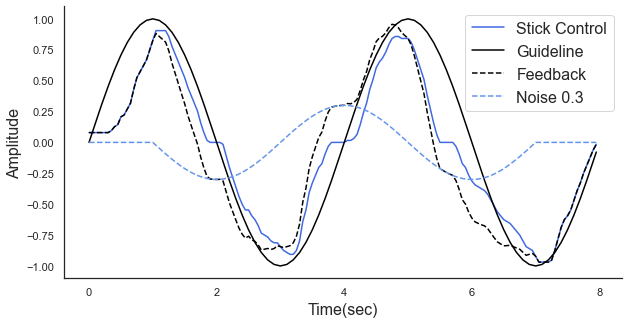

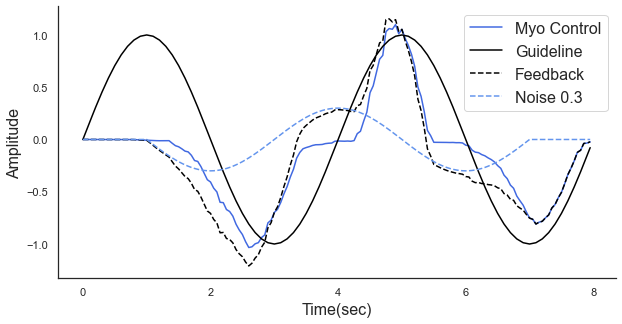

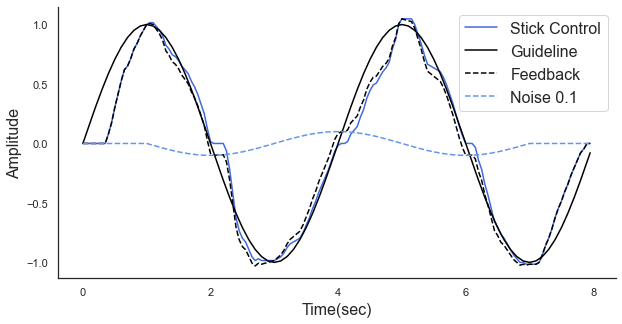

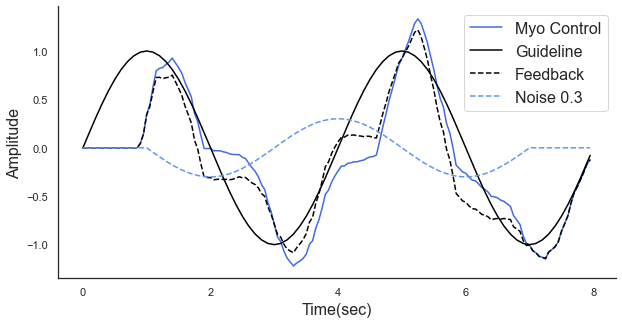

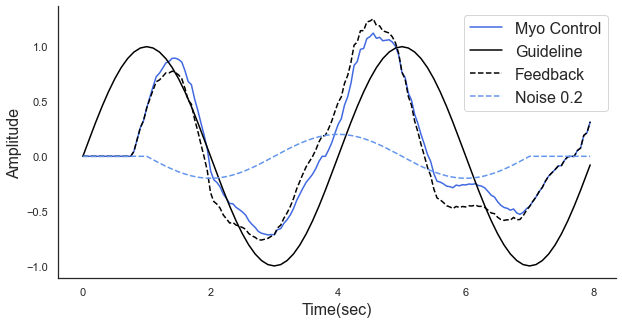

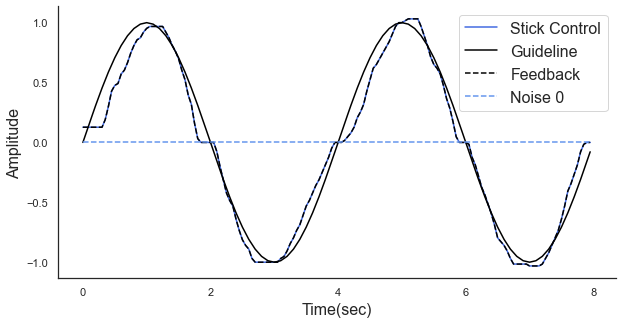

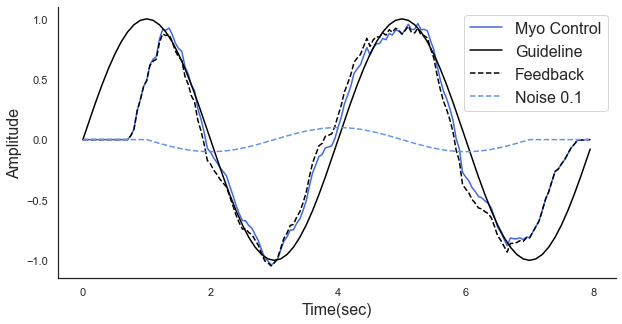

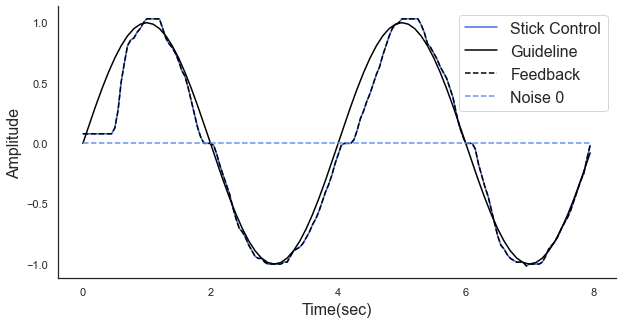

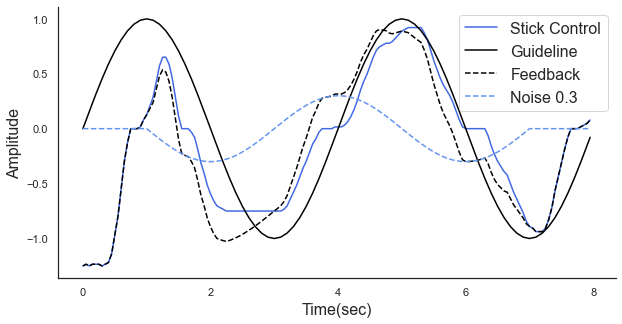

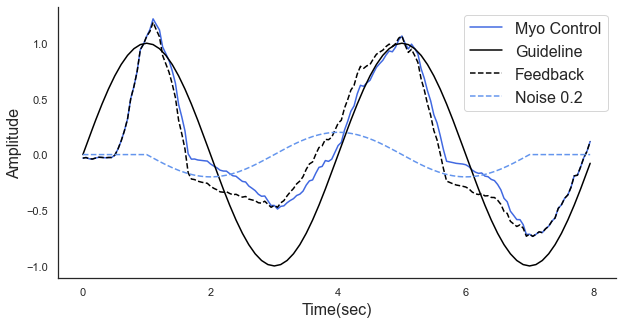

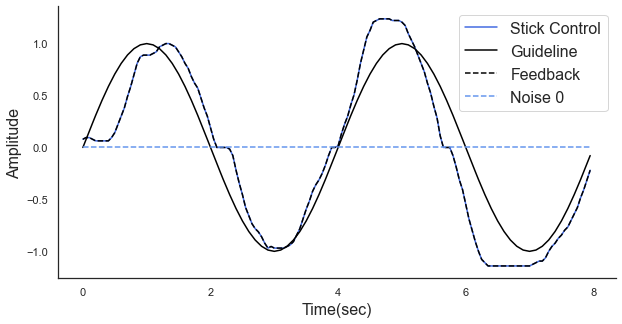

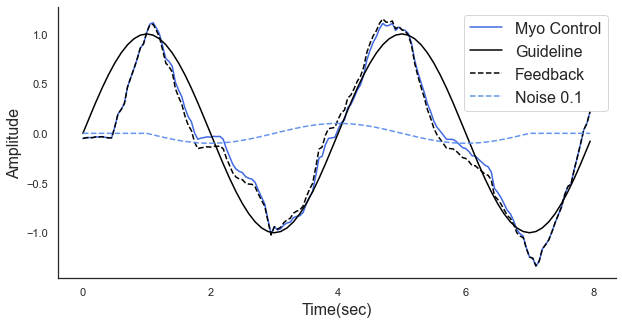

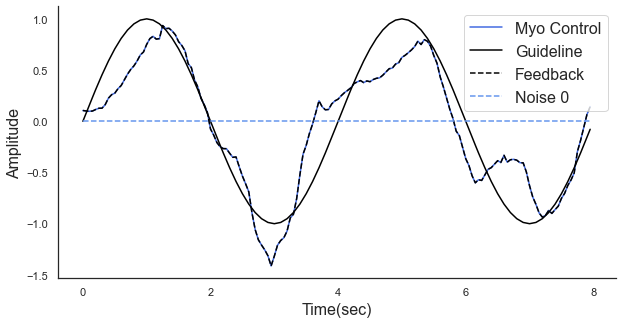

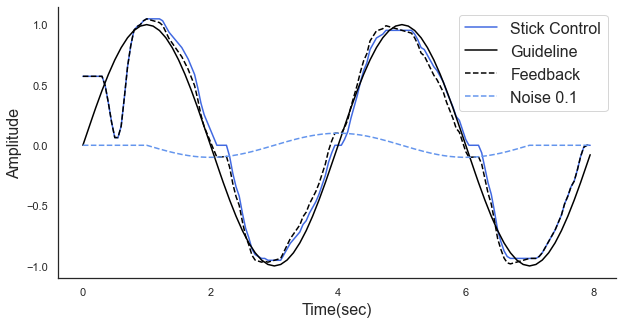

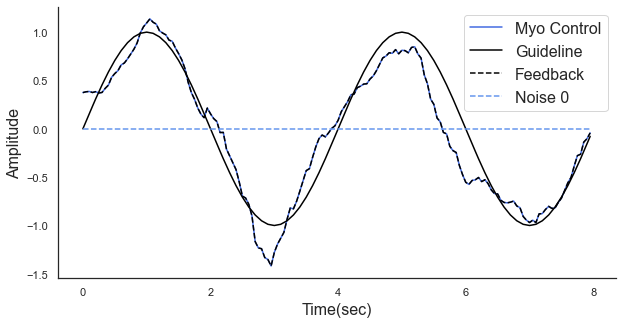

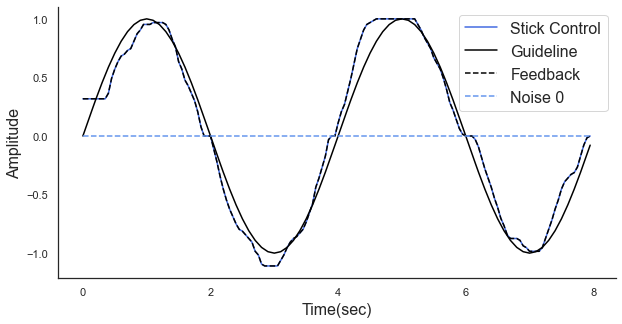

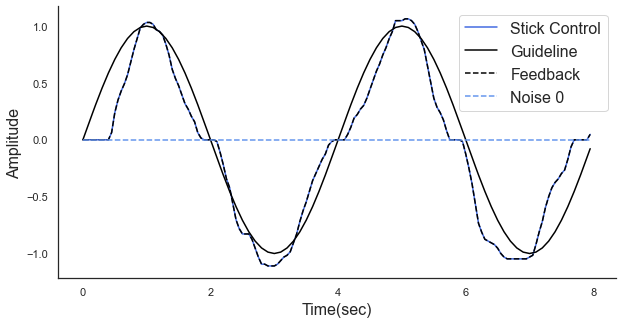

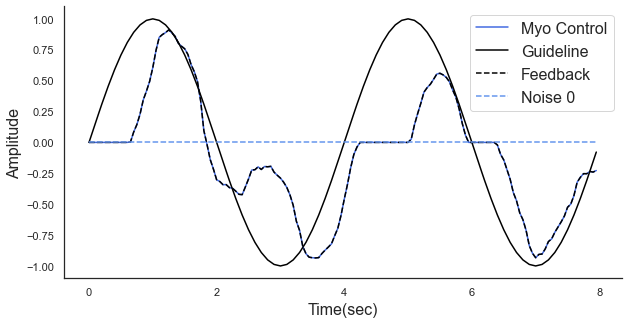

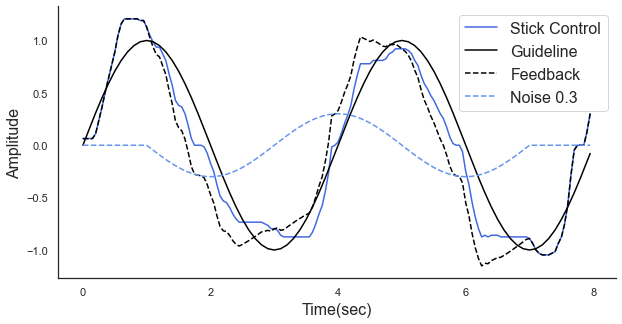

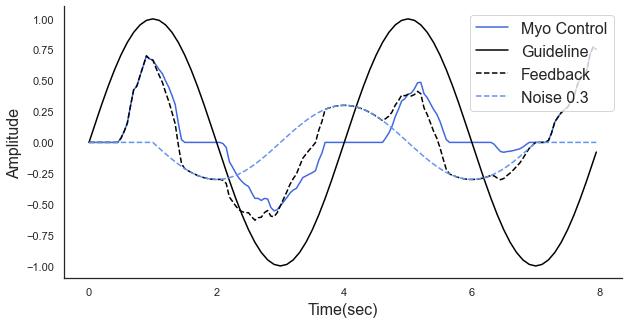

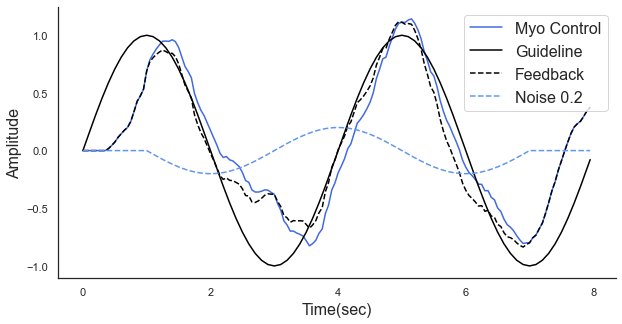

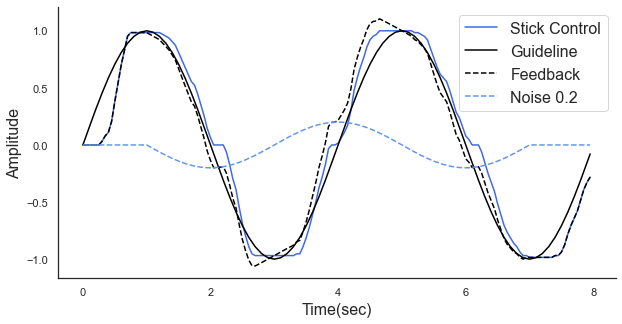

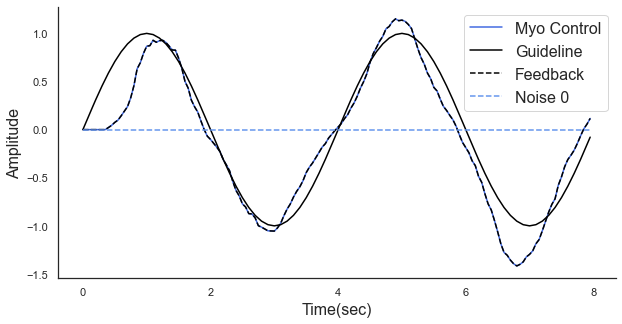

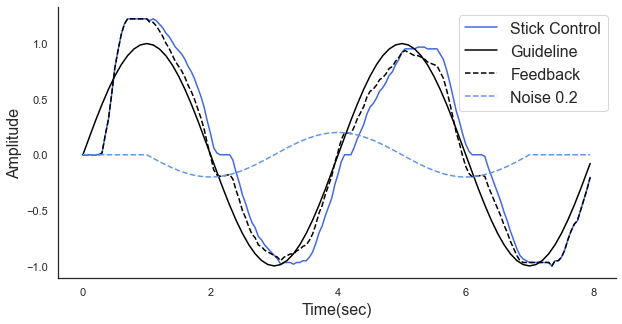

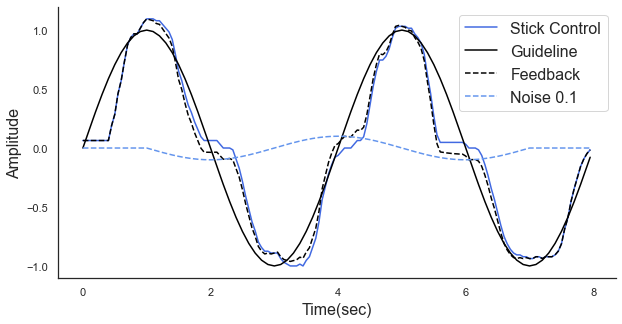

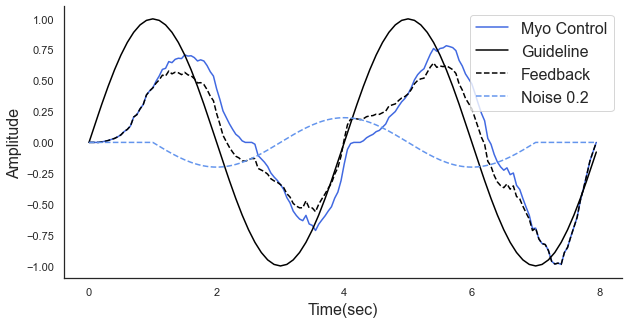

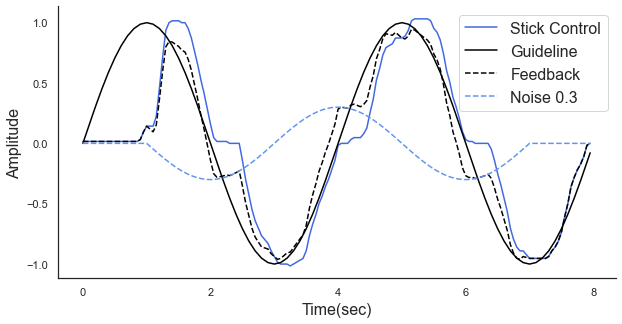

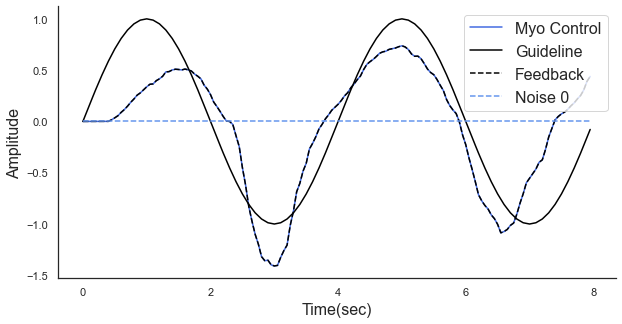

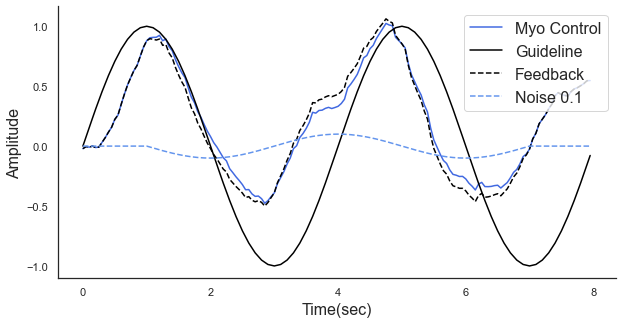

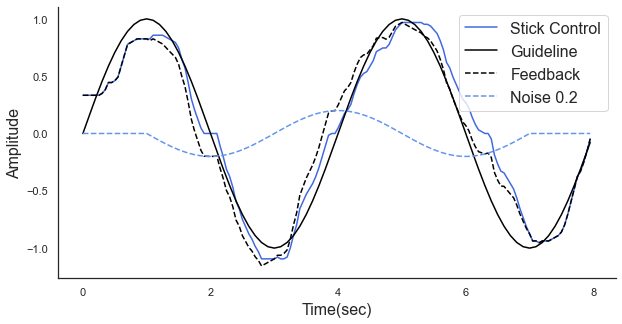

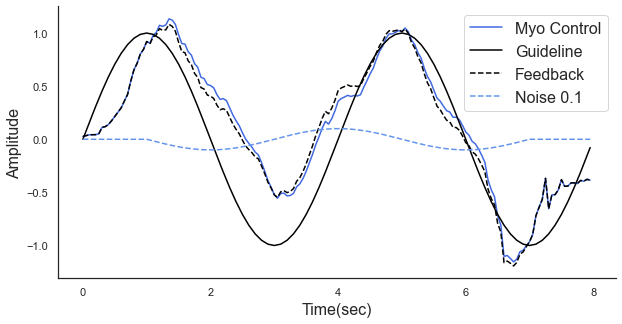

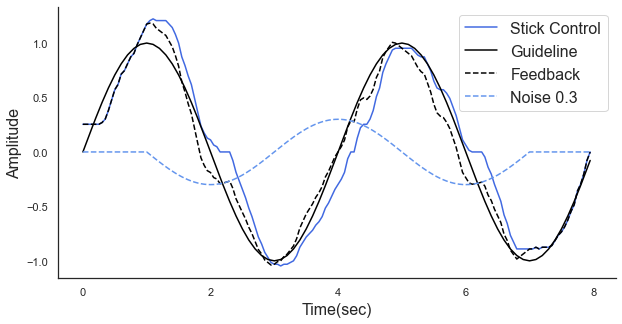

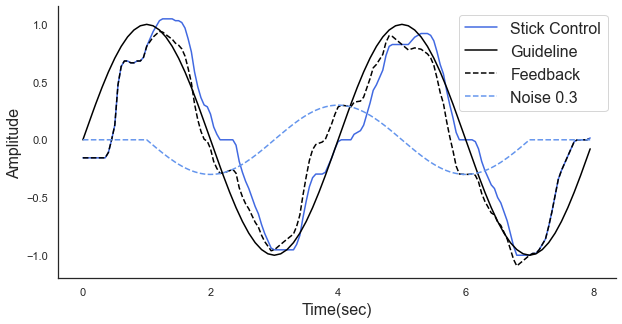

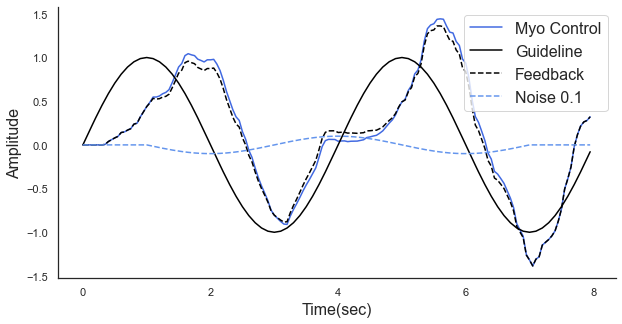

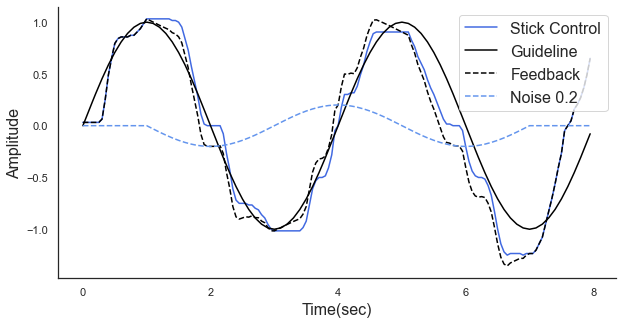

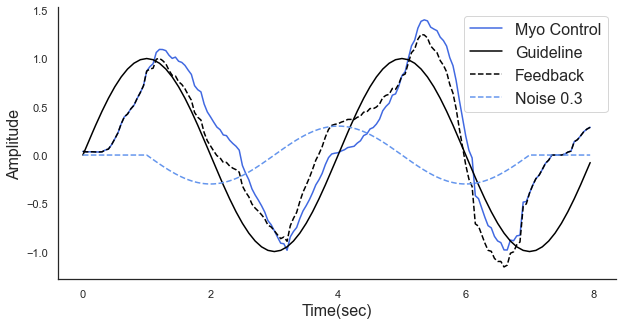

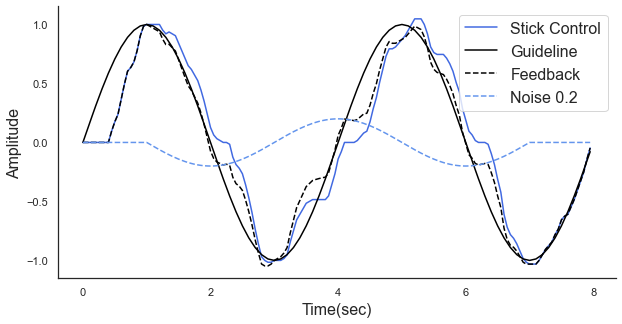

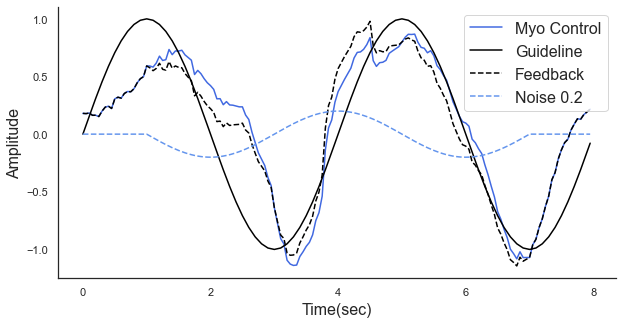

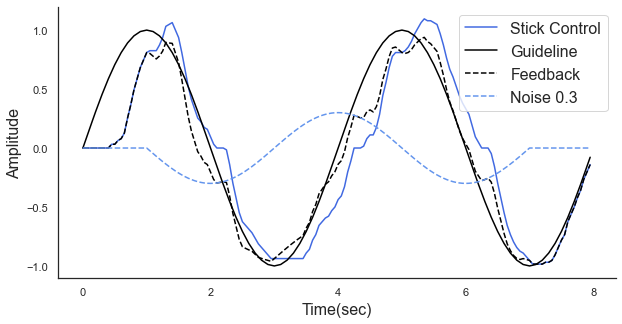

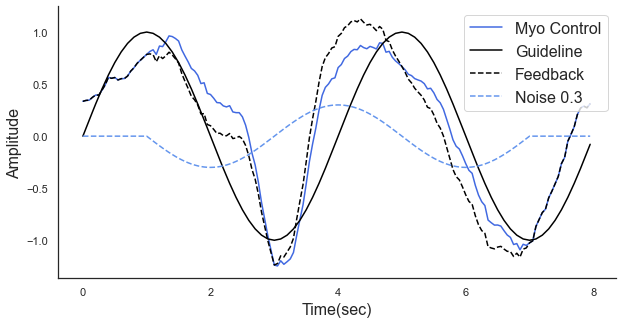

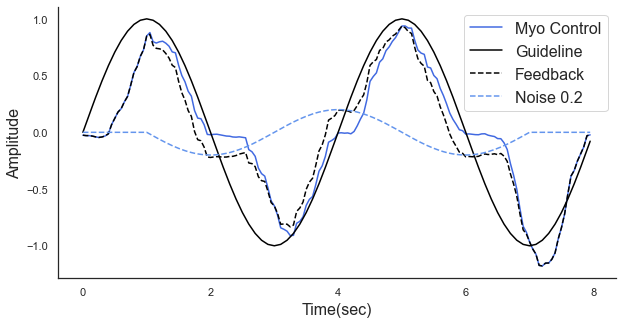

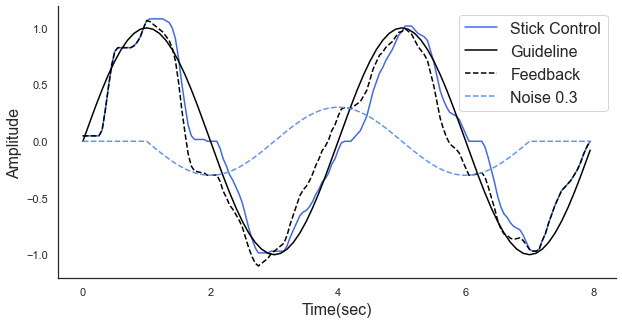

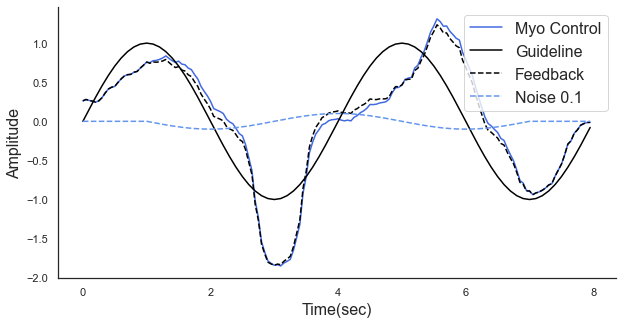

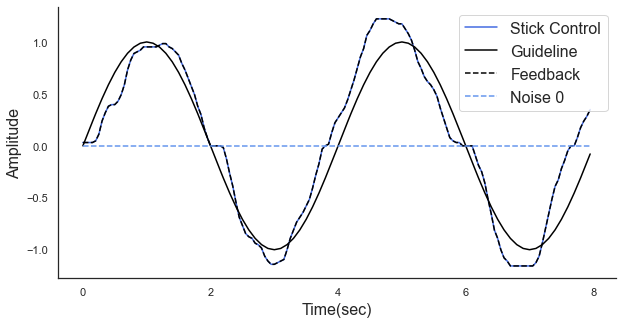

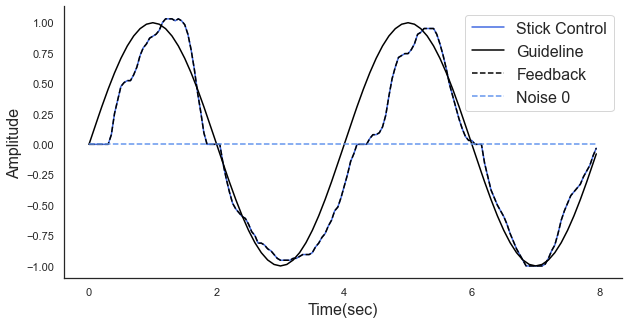

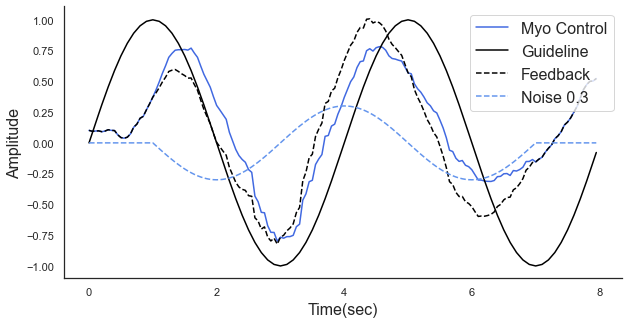

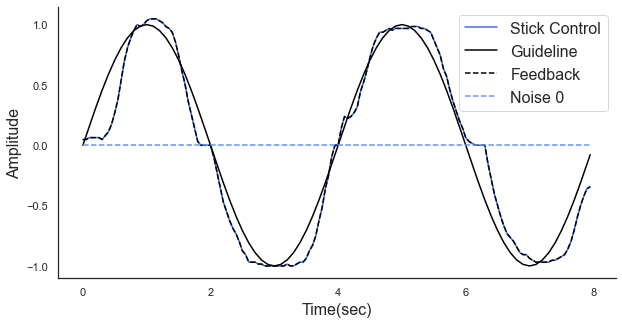

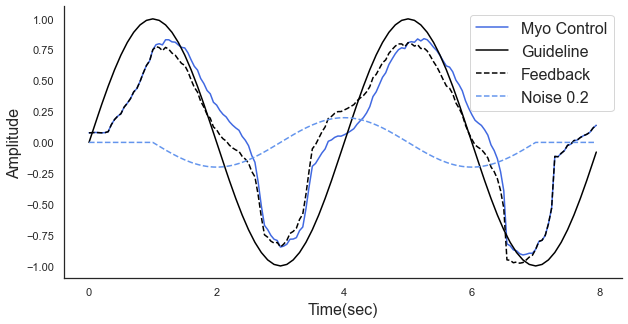

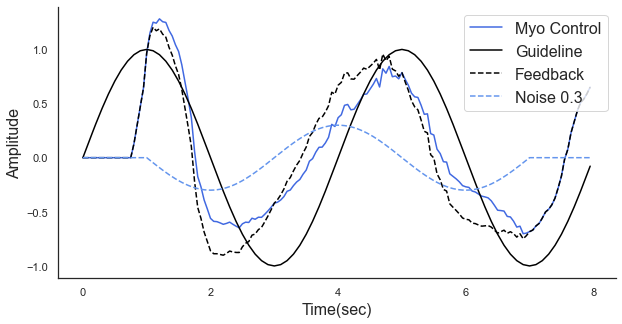

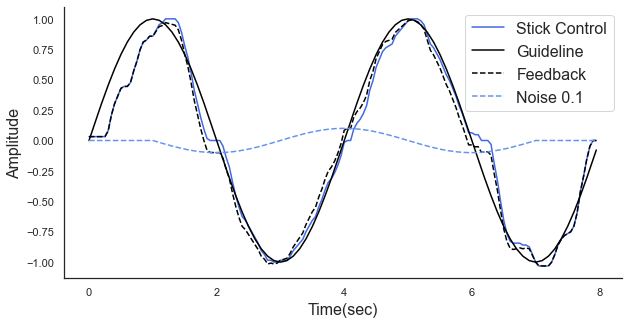

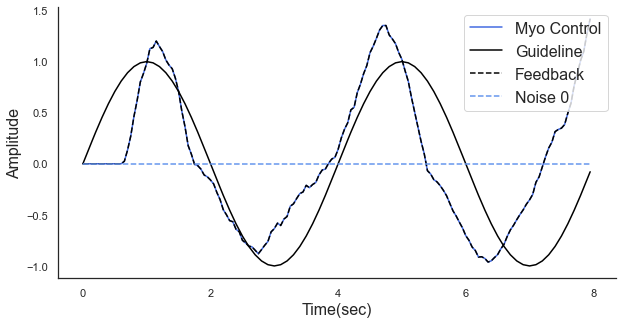

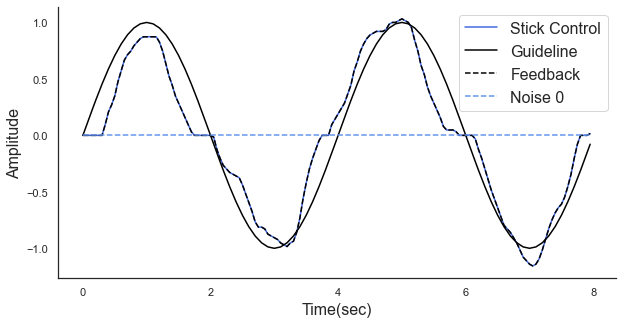

In [11]:
# Read in training data
current_directory = os.getcwd()

# data to read in: SN, BN
data = []

# participants
participants = ('SN001', 'SN002', 'SN003', 'SN004', 'SN005', 'SN006', 'SN007', 'SN008', 'SN009', 'SN010','SN012', 'SN013', 'SN014', 'SN015')
# participants = ('SN001', 'SN002')

SN=0
for p in participants:
    SN = SN+1
    root_subject = os.path.join('data', p)
    control_folders = [f.path for f in os.scandir(root_subject) if f.is_dir() and f.name.startswith('control')]
    BN = 0
    for b in control_folders:
        fb = []
        BN = BN+1
        if os.path.isfile(os.path.join(b, 'trials.csv')):
            trials = pd.read_csv(os.path.join(b, 'trials.csv'),)  
        
        plt.figure(figsize=(10,5))
                   
        if  trials["emg"][0] == 1: 
            if os.path.isfile(os.path.join(b, 'data_proc.hdf5')):
                data_proc = h5py.File(os.path.join(b, 'data_proc.hdf5'),)
            if os.path.isfile(os.path.join(b, 'cursor_position.hdf5')):
                cursor_position = h5py.File(os.path.join(b, 'cursor_position.hdf5'),) 
            if os.path.isfile(os.path.join(b, 'noise.hdf5')):
                noise = h5py.File(os.path.join(b, 'noise.hdf5'),) 
            if os.path.isfile(os.path.join(b, 'wave.hdf5')):
                wave = h5py.File(os.path.join(b, 'wave.hdf5'),) 
            
            proc = data_proc['1'][0:][0]-data_proc['1'][0:][1]
            
            sns.lineplot(data=proc[60:220], label='Myo Control', color = 'royalblue')
            sns.lineplot(data=wave['1'][60:220], color='black', label='Guideline')
            sns.lineplot(data=cursor_position['1'][60:220], linestyle='dashed', color='black',label='Feedback')
            if  trials["noise"][1] == 0.0:
                sns.lineplot(data=noise['1'][60:220], linestyle='dashed', color = 'cornflowerblue', label='Noise 0')
            if  trials["noise"][1] == 0.1:
                sns.lineplot(data=noise['1'][60:220], linestyle='dashed', color = 'cornflowerblue', label='Noise 0.1')
            if  trials["noise"][1] == 0.2:
                sns.lineplot(data=noise['1'][60:220], linestyle='dashed', color = 'cornflowerblue', label='Noise 0.2')
            if  trials["noise"][1] == 0.3:
                sns.lineplot(data=noise['1'][60:220], linestyle='dashed', color = 'cornflowerblue', label='Noise 0.3')
            # plt.title(f'Participant {SN} Block {BN} EMG Control', fontsize=16)
            plt.xlabel('Time(sec)', fontsize=16)
            plt.ylabel('Amplitude', fontsize=16)
            plt.legend(loc='upper right', fontsize=16)
            plt.xticks(ticks=[0, 40, 80, 120, 160], labels=[0, 2, 4, 6, 8])
            sns.despine()
        
        if  trials["emg"][0] == 0: 
            if os.path.isfile(os.path.join(b, 'cursor_position.hdf5')):
                cursor_position = h5py.File(os.path.join(b, 'cursor_position.hdf5'),)
            if os.path.isfile(os.path.join(b, 'data_raw.hdf5')):
                data_raw = h5py.File(os.path.join(b, 'data_raw.hdf5'),)
            if os.path.isfile(os.path.join(b, 'noise.hdf5')):
                noise = h5py.File(os.path.join(b, 'noise.hdf5'),) 
            if os.path.isfile(os.path.join(b, 'wave.hdf5')):
                wave = h5py.File(os.path.join(b, 'wave.hdf5'),) 
            
            raw = data_raw['1'][:][1]*2-data_raw['1'][:][0]*2
            
            sns.lineplot(data=raw[60:220], label='Stick Control', color = 'royalblue')           
            sns.lineplot(data=wave['1'][60:220], color='black', label='Guideline')
            sns.lineplot(data=cursor_position['1'][60:220], linestyle='dashed', color='black', label='Feedback')
            if  trials["noise"][1] == 0.0:
                sns.lineplot(data=noise['1'][60:220], linestyle='dashed', color = 'cornflowerblue', label='Noise 0')
            if  trials["noise"][1] == 0.1:
                sns.lineplot(data=noise['1'][60:220], linestyle='dashed', color = 'cornflowerblue', label='Noise 0.1')
            if  trials["noise"][1] == 0.2:
                sns.lineplot(data=noise['1'][60:220], linestyle='dashed', color = 'cornflowerblue', label='Noise 0.2')
            if  trials["noise"][1] == 0.3:
                sns.lineplot(data=noise['1'][60:220], linestyle='dashed', color = 'cornflowerblue', label='Noise 0.3')
            # plt.title(f'Participant {SN} Block {BN} Joystick Control', fontsize=16)
            plt.xlabel('Time(sec)' , fontsize=16)
            plt.ylabel('Amplitude', fontsize=16)
            plt.legend(loc='upper right', fontsize=16)
            plt.xticks(ticks=[0, 40, 80, 120, 160], labels=[0, 2, 4, 6, 8])
            sns.despine()

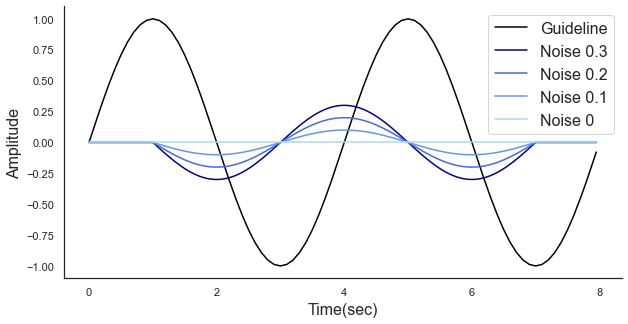

In [12]:
data = []

root_subject = os.path.join('data', 'SN001')
control_folders = [f.path for f in os.scandir(root_subject) if f.is_dir() and f.name.startswith('control')]

if os.path.isfile(os.path.join(b, 'noise.hdf5')):
        noise = h5py.File(os.path.join(b, 'noise.hdf5'),) 
if os.path.isfile(os.path.join(b, 'wave.hdf5')):
    wave = h5py.File(os.path.join(b, 'wave.hdf5'),)  
         
plt.figure(figsize=(10, 5))
sns.lineplot(data=wave['1'][60:220], color='black', label='Guideline')
sns.lineplot(data=noise['3'][60:220], color='darkblue', label='Noise 0.3')
sns.lineplot(data=noise['4'][60:220], color='royalblue', label='Noise 0.2')
sns.lineplot(data=noise['2'][60:220], color='cornflowerblue', label='Noise 0.1')
sns.lineplot(data=noise['0'][60:220], color='lightblue', label='Noise 0')
plt.legend(fontsize=16)
# plt.title(f'Wave vs Noise Signals', fontsize=16)
plt.xticks(ticks=[0, 40, 80, 120, 160], labels=[0, 2, 4, 6, 8])
plt.xlabel('Time(sec)', fontsize=16)
plt.ylabel('Amplitude', fontsize=16)
sns.despine()
        